In [44]:
import os
from PIL import Image
import scipy.io
import h5py
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import label, regionprops
from skimage.transform import resize
import pandas as pd
from scipy.ndimage import sobel
import glob
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

In [114]:
mask_folder = './Dataset_BTP/Hek_mask'
image_dimensions = {}

for image_name in os.listdir(mask_folder):
    if image_name.endswith('.tiff'):
        image_path = os.path.join(mask_folder, image_name)
        with Image.open(image_path) as img:
            width, height = img.size
            image_dimensions[image_name] = (width, height)

for image_name, dimensions in image_dimensions.items():
    print(f"{image_name}: {dimensions}")

Hek_21.tiff: (2048, 2048)
Hek_7.tiff: (2048, 2048)
Hek_17.tiff: (2048, 2048)
Hek_16.tiff: (2048, 2048)
Hek_6.tiff: (2048, 2048)
Hek_20.tiff: (2048, 2048)
Hek_1.tiff: (2048, 2048)
Hek_11.tiff: (2048, 2048)
Hek_10.tiff: (2048, 2048)
Hek_13.tiff: (2048, 2048)
Hek_3.tiff: (2048, 2048)
Hek_2.tiff: (2048, 2048)
Hek_12.tiff: (2048, 2048)
Hek_19.tiff: (2048, 2048)
Hek_9.tiff: (2048, 2048)
Hek_15.tiff: (2048, 2048)
Hek_5.tiff: (2048, 2048)
Hek_4.tiff: (2048, 2048)
Hek_14.tiff: (2048, 2048)
Hek_8.tiff: (2048, 2048)
Hek_18.tiff: (2048, 2048)


In [124]:
file_path = './Dataset_BTP/hek_opd.mat'

with h5py.File(file_path, 'r') as mat_file:
    for key in mat_file.keys():
        dimensions = mat_file[key].shape
        print(f"{file_path}: {dimensions}")
        break

./Dataset_BTP/hek_opd.mat: (21, 2048, 2048)


In [117]:
file_path = './Dataset_BTP/hek_opd.mat'
output_folder = './Dataset_BTP/Hek_opd'

os.makedirs(output_folder, exist_ok=True)
with h5py.File(file_path, 'r') as mat_file:
    key = list(mat_file.keys())[0] 
    opd_data = mat_file[key][:] 
for i in range(21):
    opd_slice = opd_data[i]
    output_file = os.path.join(output_folder, f'opd_{i+1}.mat')
    scipy.io.savemat(output_file, {'opd_slice': opd_slice})
    print(f"Saved {output_file}")

print("Extraction and saving completed.")

Saved ./Dataset_BTP/Hek_opd/opd_1.mat
Saved ./Dataset_BTP/Hek_opd/opd_2.mat
Saved ./Dataset_BTP/Hek_opd/opd_3.mat
Saved ./Dataset_BTP/Hek_opd/opd_4.mat
Saved ./Dataset_BTP/Hek_opd/opd_5.mat
Saved ./Dataset_BTP/Hek_opd/opd_6.mat
Saved ./Dataset_BTP/Hek_opd/opd_7.mat
Saved ./Dataset_BTP/Hek_opd/opd_8.mat
Saved ./Dataset_BTP/Hek_opd/opd_9.mat
Saved ./Dataset_BTP/Hek_opd/opd_10.mat
Saved ./Dataset_BTP/Hek_opd/opd_11.mat
Saved ./Dataset_BTP/Hek_opd/opd_12.mat
Saved ./Dataset_BTP/Hek_opd/opd_13.mat
Saved ./Dataset_BTP/Hek_opd/opd_14.mat
Saved ./Dataset_BTP/Hek_opd/opd_15.mat
Saved ./Dataset_BTP/Hek_opd/opd_16.mat
Saved ./Dataset_BTP/Hek_opd/opd_17.mat
Saved ./Dataset_BTP/Hek_opd/opd_18.mat
Saved ./Dataset_BTP/Hek_opd/opd_19.mat
Saved ./Dataset_BTP/Hek_opd/opd_20.mat
Saved ./Dataset_BTP/Hek_opd/opd_21.mat
Extraction and saving completed.


In [118]:
# to check dimensions of opd mat

opd_folder = './Dataset_BTP/Hek_opd'
opd_dimensions = {}

for file_name in os.listdir(opd_folder):
    if file_name.endswith('.mat'):
        file_path = os.path.join(opd_folder, file_name)
        # print(file_path)
        mat_file = scipy.io.loadmat(file_path)
        opd_dimensions[file_name] = mat_file['opd_slice'].shape
        

for file_name, dimensions in opd_dimensions.items():
    print(f"{file_name}: {dimensions}")

opd_5.mat: (2048, 2048)
opd_18.mat: (2048, 2048)
opd_19.mat: (2048, 2048)
opd_4.mat: (2048, 2048)
opd_6.mat: (2048, 2048)
opd_7.mat: (2048, 2048)
opd_3.mat: (2048, 2048)
opd_2.mat: (2048, 2048)
opd_21.mat: (2048, 2048)
opd_20.mat: (2048, 2048)
opd_1.mat: (2048, 2048)
opd_11.mat: (2048, 2048)
opd_10.mat: (2048, 2048)
opd_12.mat: (2048, 2048)
opd_13.mat: (2048, 2048)
opd_17.mat: (2048, 2048)
opd_16.mat: (2048, 2048)
opd_9.mat: (2048, 2048)
opd_14.mat: (2048, 2048)
opd_15.mat: (2048, 2048)
opd_8.mat: (2048, 2048)


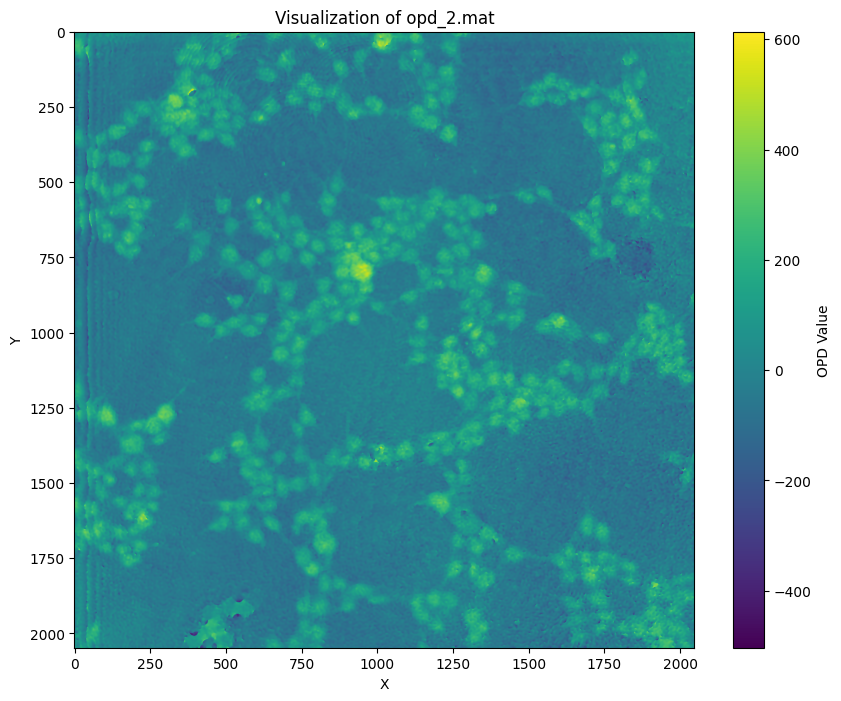

In [122]:
opd_file = './Dataset_BTP/Hek_opd/opd_2.mat'
mat_data = scipy.io.loadmat(opd_file)

opd_matrix = mat_data['opd_slice'] 
plt.figure(figsize=(10, 8))
plt.imshow(opd_matrix, cmap='viridis', aspect='auto')
plt.colorbar(label='OPD Value')
plt.title(f'Visualization of {os.path.basename(opd_file)}')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

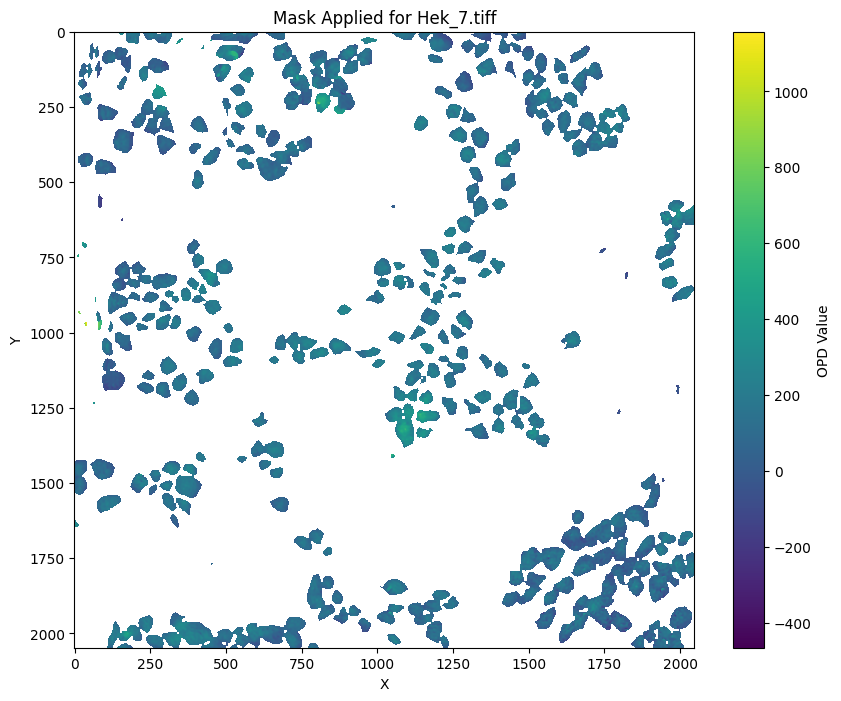

In [120]:
opd_file = './Dataset_BTP/Hek_opd/opd_7.mat'
mask_file = './Dataset_BTP/Hek_mask/Hek_7.tiff'

mat_data = scipy.io.loadmat(opd_file)
opd_matrix = mat_data['opd_slice']
mask = np.array(Image.open(mask_file))
if mask.shape != opd_matrix.shape:
    print(f"Shape mismatch: OPD Matrix Shape = {opd_matrix.shape}, Mask Shape = {mask.shape}")


masked_opd = np.where(mask.T > 0, opd_matrix, np.nan)
plt.figure(figsize=(10, 8))
plt.imshow(masked_opd, cmap='viridis', aspect='auto')
plt.colorbar(label='OPD Value')
plt.title(f'Mask Applied for {os.path.basename(mask_file)}')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [77]:
mask_file = './Dataset_BTP/Hek_mask/Hek_21.tiff'
opd_file = './Dataset_BTP/Hek_opd/opd_21.mat'
cell_opd_folder = './hek_cell_opd_data'

mask = np.array(Image.open(mask_file))
mat_data = scipy.io.loadmat(opd_file)
opd_matrix = mat_data['opd_slice']

masked_opd = np.where(mask.T > 0, opd_matrix, np.nan) 
labeled_mask = label(mask.T)
regions = regionprops(labeled_mask) 

for cell in regions:
    cell_id = cell.label 
    cell_mask = (labeled_mask == cell_id) 
    cell_opd = opd_matrix[cell_mask]
    cell_opd_matrix = np.full(opd_matrix.shape, np.nan)
    cell_opd_matrix[cell_mask] = cell_opd 
    save_path = os.path.join(cell_opd_folder, f'opd_Hek_21_cell_{cell_id}.mat')
    scipy.io.savemat(save_path, {'cell_opd': cell_opd_matrix})
    print(f"OPD matrix for cell {cell_id} saved as {save_path}")

print("OPD matrices for individual cells extracted and saved successfully.")



OPD matrix for cell 1 saved as ./hek_cell_opd_data/opd_Hek_21_cell_1.mat
OPD matrix for cell 2 saved as ./hek_cell_opd_data/opd_Hek_21_cell_2.mat
OPD matrix for cell 3 saved as ./hek_cell_opd_data/opd_Hek_21_cell_3.mat
OPD matrix for cell 4 saved as ./hek_cell_opd_data/opd_Hek_21_cell_4.mat
OPD matrix for cell 5 saved as ./hek_cell_opd_data/opd_Hek_21_cell_5.mat
OPD matrix for cell 6 saved as ./hek_cell_opd_data/opd_Hek_21_cell_6.mat
OPD matrix for cell 7 saved as ./hek_cell_opd_data/opd_Hek_21_cell_7.mat
OPD matrix for cell 8 saved as ./hek_cell_opd_data/opd_Hek_21_cell_8.mat
OPD matrix for cell 9 saved as ./hek_cell_opd_data/opd_Hek_21_cell_9.mat
OPD matrix for cell 10 saved as ./hek_cell_opd_data/opd_Hek_21_cell_10.mat
OPD matrix for cell 11 saved as ./hek_cell_opd_data/opd_Hek_21_cell_11.mat
OPD matrix for cell 12 saved as ./hek_cell_opd_data/opd_Hek_21_cell_12.mat
OPD matrix for cell 13 saved as ./hek_cell_opd_data/opd_Hek_21_cell_13.mat
OPD matrix for cell 14 saved as ./hek_cell_

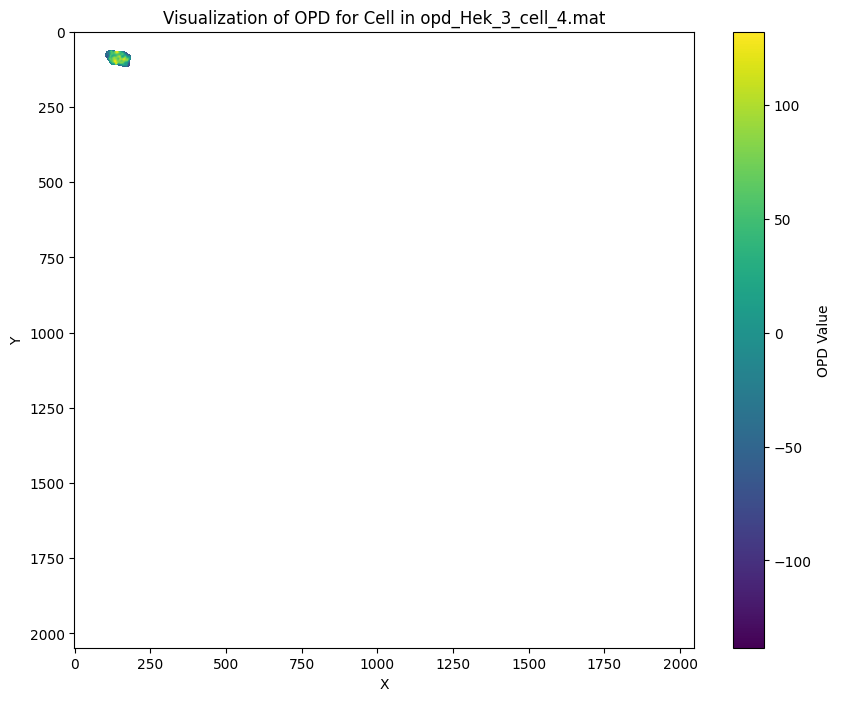

In [113]:
cell_opd_file = './hek_cell_opd_data/opd_Hek_3_cell_4.mat'  
cell_data = scipy.io.loadmat(cell_opd_file)
cell_opd_matrix = cell_data['cell_opd']
plt.figure(figsize=(10, 8))
plt.imshow(cell_opd_matrix, cmap='viridis', aspect='auto')
plt.colorbar(label='OPD Value')
plt.title(f'Visualization of OPD for Cell in {os.path.basename(cell_opd_file)}')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [86]:
cell_opd_folder = './hek_cell_opd_data'
output_mean_csv = './Hek_CSV/cell_opd_mean.csv'
output_median_csv = './Hek_CSV/cell_opd_median.csv'
mean_results = []
median_results = []

for file_name in os.listdir(cell_opd_folder):
    if file_name.endswith('.mat'):
        file_path = os.path.join(cell_opd_folder, file_name)
        opd_data = scipy.io.loadmat(file_path)['cell_opd']
        opd_data[opd_data < 0] = 0
        
        valid_opd_values = opd_data[np.isfinite(opd_data)]
        
        if valid_opd_values.size > 0:
            mean_opd = np.mean(valid_opd_values)
            median_opd = np.median(valid_opd_values)
        else:
            mean_opd = np.nan
            median_opd = np.nan
        
        parts = file_name.split('_')
        image_id = int(parts[2]) 
        cell_id = int(parts[-1].replace('.mat', '')) 

        mean_results.append({'Image_ID': image_id,'Cell_ID': cell_id,'Mean_OPD': mean_opd})

        median_results.append({'Image_ID': image_id,'Cell_ID': cell_id,'Median_OPD': median_opd})

df_mean = pd.DataFrame(mean_results)
df_median = pd.DataFrame(median_results)

df_mean.sort_values(by=['Image_ID', 'Cell_ID'], inplace=True)
df_median.sort_values(by=['Image_ID', 'Cell_ID'], inplace=True)

df_mean.to_csv(output_mean_csv, index=False)
df_median.to_csv(output_median_csv, index=False)



In [87]:
cell_opd_folder = './hek_cell_opd_data'
output_csv = './HEK_CSV/cell_opd_dry_mass.csv'
mean_opd_csv = './HEK_CSV/cell_opd_mean.csv'

refractive_increment = 0.2
mean_opd_df = pd.read_csv(mean_opd_csv)
mean_opd_dict = {(row['Image_ID'], row['Cell_ID']): row['Mean_OPD'] for _, row in mean_opd_df.iterrows()}

results_dry_mass = []
for opd_file in os.listdir(cell_opd_folder):
    if opd_file.endswith('.mat'):
        base_name = opd_file[:-4]
        parts = opd_file.split('_') 
        image_id = int(parts[2].replace('.', '')) 
        cell_id = int(parts[-1].replace('.mat', '').replace('cell', '').replace('_', ''))
        mean_opd = mean_opd_dict.get((image_id, cell_id), np.nan)
        
        opd_path = os.path.join(cell_opd_folder, opd_file)
        mat_data = scipy.io.loadmat(opd_path)
        cell_opd_matrix = mat_data['cell_opd']
    
        cell_area = np.sum(~np.isnan(cell_opd_matrix))
        
        dry_mass = (cell_area * mean_opd) / refractive_increment
        results_dry_mass.append([image_id, cell_id, dry_mass])

df = pd.DataFrame(results_dry_mass, columns=['Image_ID', 'Cell_ID', 'Dry_Mass'])
df_sorted = df.sort_values(by=['Image_ID', 'Cell_ID'])
df_sorted.to_csv(output_csv, index=False)

print(f"Dry mass calculation completed and saved to {output_csv}.")

Dry mass calculation completed and saved to ./HEK_CSV/cell_opd_dry_mass.csv.


In [102]:
cell_opd_folder = './hek_cell_opd_data'
output_csv = './HEK_CSV/cell_opd_density.csv'
mean_opd_csv = './HEK_CSV/cell_opd_mean.csv'

refractive_increment = 0.2
mean_opd_df = pd.read_csv(mean_opd_csv)
mean_opd_dict = {(row['Image_ID'], row['Cell_ID']): row['Mean_OPD'] for _, row in mean_opd_df.iterrows()}

results_density = []
for opd_file in os.listdir(cell_opd_folder):
    if opd_file.endswith('.mat'):
        parts = opd_file.split('_')
        image_id = int(parts[2].replace('.', ''))
        cell_id = int(parts[-1].replace('.mat', '').replace('cell', '').replace('_', ''))
        
        mean_opd = mean_opd_dict.get((image_id, cell_id), np.nan)
        
        density = mean_opd / refractive_increment
        results_density.append([image_id, cell_id, density])
df = pd.DataFrame(results_density, columns=['Image_ID', 'Cell_ID', 'Density'])
df_sorted = df.sort_values(by=['Image_ID', 'Cell_ID'])
df_sorted.to_csv(output_csv, index=False)

print(f"Density calculation completed and saved to {output_csv}.")


Density calculation completed and saved to ./HEK_CSV/cell_opd_density.csv.


In [103]:
cell_opd_folder = './hek_cell_opd_data'
output_csv = './HEK_CSV/cell_opd_phase_volume.csv'
dry_mass_opd_csv = './HEK_CSV/cell_opd_dry_mass.csv'

refractive_increment = 0.2
dry_mass_opd_df = pd.read_csv(dry_mass_opd_csv)

dry_mass_opd_dict = {(row['Image_ID'], row['Cell_ID']): row['Dry_Mass'] for _, row in dry_mass_opd_df.iterrows()}
results_phase_volume = []

for opd_file in os.listdir(cell_opd_folder):
    if opd_file.endswith('.mat'):
        parts = opd_file.split('_')
        image_id = int(parts[2].replace('.', ''))
        cell_id = int(parts[-1].replace('.mat', '').replace('cell', '').replace('_', ''))
        dry_mass_opd = dry_mass_opd_dict.get((image_id, cell_id), np.nan)
        
        phase_volume = (dry_mass_opd) * refractive_increment
        results_phase_volume.append([image_id, cell_id, phase_volume])

df = pd.DataFrame(results_phase_volume, columns=['Image_ID', 'Cell_ID', 'Phase Volume'])
df_sorted = df.sort_values(by=['Image_ID', 'Cell_ID'])
df_sorted.to_csv(output_csv, index=False)

print(f"Phase Volume calculation completed and saved to {output_csv}.")

Phase Volume calculation completed and saved to ./HEK_CSV/cell_opd_phase_volume.csv.


In [104]:
cell_opd_folder = './hek_cell_opd_data'
output_surface_area_csv = './HEK_CSV/cell_phase_surface_area.csv'

surface_area_results = []

for opd_file in os.listdir(cell_opd_folder):
    if opd_file.endswith('.mat'):
        parts = opd_file.split('_')
        image_id = int(parts[2].replace('.', ''))  
        cell_id = int(parts[-1].replace('.mat', '').replace('cell', '').replace('_', ''))
        
        opd_path = os.path.join(cell_opd_folder, opd_file)
        mat_data = scipy.io.loadmat(opd_path)
        cell_opd_matrix = mat_data['cell_opd']
    
        opd_dx = sobel(cell_opd_matrix, axis=1)
        opd_dy = sobel(cell_opd_matrix, axis=0)
        surface_area_element = np.sqrt(1 + opd_dx**2 + opd_dy**2)
        surface_area = np.nansum(surface_area_element)
        
        surface_area_results.append([image_id, cell_id, surface_area])
df_surface_area = pd.DataFrame(surface_area_results, columns=['Image_ID', 'Cell_ID', 'Phase_Surface_Area'])
df_surface_area_sorted = df_surface_area.sort_values(by=['Image_ID', 'Cell_ID'])
df_surface_area_sorted.to_csv(output_surface_area_csv, index=False)

print(f"Phase surface area calculation completed and saved to {output_surface_area_csv}.")


Phase surface area calculation completed and saved to ./HEK_CSV/cell_phase_surface_area.csv.


In [105]:
surface_area_csv = './HEK_CSV/cell_phase_surface_area.csv'
volume_csv = './HEK_CSV/cell_opd_phase_volume.csv'
output_csv = './HEK_CSV/cell_phase_surface_area_to_volume_ratio.csv'
surface_area_df = pd.read_csv(surface_area_csv)
volume_df = pd.read_csv(volume_csv)

merged_df = pd.merge(surface_area_df, volume_df, on=['Image_ID', 'Cell_ID'])
merged_df['Phase_Surface_Area_to_Volume_Ratio'] = merged_df['Phase_Surface_Area'] / merged_df['Phase Volume']
result_df = merged_df[['Image_ID', 'Cell_ID', 'Phase_Surface_Area_to_Volume_Ratio']]
result_df = result_df.sort_values(by=['Image_ID', 'Cell_ID'])
result_df.to_csv(output_csv, index=False)

print(f"Phase Surface Area to Volume Ratio has been calculated and saved to {output_csv}")

Phase Surface Area to Volume Ratio has been calculated and saved to ./HEK_CSV/cell_phase_surface_area_to_volume_ratio.csv


In [106]:
surface_area_csv = './HEK_CSV/cell_phase_surface_area.csv'
mass_csv = './HEK_CSV/cell_opd_dry_mass.csv'
output_csv = './HEK_CSV/cell_phase_surface_area_to_dry_mass_ratio.csv'
surface_area_df = pd.read_csv(surface_area_csv)
mass_df = pd.read_csv(mass_csv)

merged_df = pd.merge(surface_area_df, mass_df, on=['Image_ID', 'Cell_ID'])
merged_df['Phase_Surface_Area_to_Dry_Mass_Ratio'] = merged_df['Phase_Surface_Area'] / merged_df['Dry_Mass']
result_df = merged_df[['Image_ID', 'Cell_ID', 'Phase_Surface_Area_to_Dry_Mass_Ratio']]
result_df = result_df.sort_values(by=['Image_ID', 'Cell_ID'])
result_df.to_csv(output_csv, index=False)

print(f"Phase Surface Area to Dry Mass Ratio has been calculated and saved to {output_csv}")

Phase Surface Area to Dry Mass Ratio has been calculated and saved to ./HEK_CSV/cell_phase_surface_area_to_dry_mass_ratio.csv


In [107]:
cell_opd_folder = './hek_cell_opd_data'
volume_csv = './HEK_CSV/cell_opd_phase_volume.csv'
output_csv = './HEK_CSV/cell_projected_area_to_volume.csv'

volume_df = pd.read_csv(volume_csv)
volume_dict = {(row['Image_ID'], row['Cell_ID']): row['Phase Volume'] for _, row in volume_df.iterrows()}

projected_area_to_volume_results = []
for opd_file in os.listdir(cell_opd_folder):
    if opd_file.endswith('.mat'):
        parts = opd_file.split('_')
        image_id = int(parts[2].replace('.', ''))  
        cell_id = int(parts[-1].replace('.mat', '').replace('cell', '').replace('_', ''))
        
        volume = volume_dict.get((image_id, cell_id), np.nan)
        
        opd_path = os.path.join(cell_opd_folder, opd_file)
        mat_data = scipy.io.loadmat(opd_path)
        cell_opd_matrix = mat_data['cell_opd']
        cell_area = np.sum(~np.isnan(cell_opd_matrix))
        # print(cell_area)

        if volume != 0:
            projected_area_to_volume = cell_area / volume
        else:
            projected_area_to_volume = np.nan
        
        projected_area_to_volume_results.append([image_id, cell_id, projected_area_to_volume])

df_projectedarea = pd.DataFrame(projected_area_to_volume_results, columns=['Image_ID', 'Cell_ID', 'Projected_Area_To_Volume'])
df_projectedarea_sorted = df_projectedarea.sort_values(by=['Image_ID', 'Cell_ID'])

df_projectedarea_sorted.to_csv(output_csv, index=False)

print(f"Projected area to volume calculation completed and saved to {output_csv}.")

Projected area to volume calculation completed and saved to ./HEK_CSV/cell_projected_area_to_volume.csv.


In [108]:
surface_area_csv = './HEK_CSV/cell_phase_surface_area.csv'
volume_csv = './HEK_CSV/cell_opd_phase_volume.csv'
output_csv = './HEK_CSV/cell_opd_phase_sphericity_index.csv'

df_surface_area = pd.read_csv(surface_area_csv)
df_volume = pd.read_csv(volume_csv)

df_merged = pd.merge(df_surface_area, df_volume, on=['Image_ID', 'Cell_ID'])
df_merged['Phase_Sphericity_Index'] = (np.pi**(1/3) * (6 * df_merged['Phase Volume'])**(2/3)) / df_merged['Phase_Surface_Area']
df_merged[['Image_ID', 'Cell_ID', 'Phase_Sphericity_Index']].to_csv(output_csv, index=False)

print(f"Phase sphericity index calculation completed and saved to {output_csv}.")

Phase sphericity index calculation completed and saved to ./HEK_CSV/cell_opd_phase_sphericity_index.csv.


In [109]:
cell_opd_folder = './hek_cell_opd_data'
output_csv = './HEK_CSV/cell_opd_phase_variance.csv'

variance_results = []

for opd_file in os.listdir(cell_opd_folder):
    if opd_file.endswith('.mat'):
        file_path = os.path.join(cell_opd_folder, opd_file)

        mat_data = scipy.io.loadmat(file_path)
        cell_opd_matrix = mat_data['cell_opd']
        
        valid_opd_values = cell_opd_matrix[np.isfinite(cell_opd_matrix)].flatten()
        K = len(valid_opd_values)

        if K > 1:
            mean_opd = np.mean(valid_opd_values)
            phase_variance = np.var(valid_opd_values, ddof=1)
        else:
            mean_opd = np.nan
            phase_variance = np.nan
        
        parts = opd_file.split('_')
        image_id = int(parts[2].replace('.', ''))  
        cell_id = int(parts[-1].replace('.mat', '').replace('cell', '').replace('_', ''))

        variance_results.append({
            'Image_ID': image_id,
            'Cell_ID': cell_id,
            'Phase_Variance': phase_variance
        })
df_variance = pd.DataFrame(variance_results)
df_variance_sorted = df_variance.sort_values(by=['Image_ID', 'Cell_ID'])
df_variance_sorted.to_csv(output_csv, index=False)

print(f"Phase variance calculation completed and saved to {output_csv}.")


Phase variance calculation completed and saved to ./HEK_CSV/cell_opd_phase_variance.csv.


In [110]:
cell_opd_folder = './hek_cell_opd_data'
output_csv = './HEK_CSV/cell_opd_phase_kurtosis.csv'

results_kurtosis = []

for opd_file in os.listdir(cell_opd_folder):
    if opd_file.endswith('.mat'):
        parts = opd_file.split('_')
        image_id = int(parts[2].replace('.', ''))  
        cell_id = int(parts[-1].replace('.mat', '').replace('cell', '').replace('_', ''))
        
        opd_path = os.path.join(cell_opd_folder, opd_file)
        mat_data = scipy.io.loadmat(opd_path)
        cell_opd_matrix = mat_data['cell_opd']
        
        valid_opd_values = cell_opd_matrix[np.isfinite(cell_opd_matrix)]
        if valid_opd_values.size > 0:
            mean_opd = np.mean(valid_opd_values)
            variance_opd = np.var(valid_opd_values, ddof=0)
            fourth_moment = np.mean((valid_opd_values - mean_opd)**4)
            kurtosis = fourth_moment / (variance_opd**2)
        else:
            kurtosis = np.nan
        
        results_kurtosis.append([image_id, cell_id, kurtosis])

df = pd.DataFrame(results_kurtosis, columns=['Image_ID', 'Cell_ID', 'Phase_Kurtosis'])
df_sorted = df.sort_values(by=['Image_ID', 'Cell_ID'])
df_sorted.to_csv(output_csv, index=False)

print(f"Phase kurtosis calculation completed and saved to {output_csv}.")

/var/folders/ms/jcbjc8jx1414fy57pjk6fh780000gn/T/ipykernel_4251/2724874188.py:21: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = fourth_moment / (variance_opd**2)


Phase kurtosis calculation completed and saved to ./HEK_CSV/cell_opd_phase_kurtosis.csv.


In [111]:
cell_opd_folder = './hek_cell_opd_data'
output_csv = './HEK_CSV/cell_opd_phase_skewness.csv'

results_skewness = []

for opd_file in os.listdir(cell_opd_folder):
    if opd_file.endswith('.mat'):
        parts = opd_file.split('_')
        image_id = int(parts[2].replace('.', ''))  
        cell_id = int(parts[-1].replace('.mat', '').replace('cell', '').replace('_', ''))
        
        opd_path = os.path.join(cell_opd_folder, opd_file)
        mat_data = scipy.io.loadmat(opd_path)
        cell_opd_matrix = mat_data['cell_opd']
        
        valid_opd_values = cell_opd_matrix[np.isfinite(cell_opd_matrix)]
        if valid_opd_values.size > 0:
            mean_opd = np.mean(valid_opd_values)
            variance_opd = np.var(valid_opd_values, ddof=0)
            std_dev_opd = np.sqrt(variance_opd)
            skewness = np.mean((valid_opd_values - mean_opd)**3) / (std_dev_opd**3)
        else:
            skewness = np.nan
        
        results_skewness.append([image_id, cell_id, skewness])

df = pd.DataFrame(results_skewness, columns=['Image_ID', 'Cell_ID', 'Phase_Skewness'])
df_sorted = df.sort_values(by=['Image_ID', 'Cell_ID'])
df_sorted.to_csv(output_csv, index=False)

print(f"Phase skewness calculation completed and saved to {output_csv}.")


/var/folders/ms/jcbjc8jx1414fy57pjk6fh780000gn/T/ipykernel_4251/3321835314.py:21: RuntimeWarning: invalid value encountered in scalar divide
  skewness = np.mean((valid_opd_values - mean_opd)**3) / (std_dev_opd**3)


Phase skewness calculation completed and saved to ./HEK_CSV/cell_opd_phase_skewness.csv.


In [98]:
cell_opd_folder = './hek_cell_opd_data'
output_csv = './HEK_CSV/cell_opd_energy.csv'

results_energy = []

for opd_file in os.listdir(cell_opd_folder):
    if opd_file.endswith('.mat'):
        parts = opd_file.split('_')
        image_id = int(parts[2].replace('.', ''))  
        cell_id = int(parts[-1].replace('.mat', '').replace('cell', '').replace('_', ''))
        
        opd_path = os.path.join(cell_opd_folder, opd_file)
        mat_data = scipy.io.loadmat(opd_path)
        cell_opd_matrix = mat_data['cell_opd']
        
        valid_opd_values = cell_opd_matrix[np.isfinite(cell_opd_matrix)]
        if valid_opd_values.size > 0:
            mean_opd = np.mean(valid_opd_values)
            energy = np.sum((valid_opd_values - mean_opd)**2)
        else:
            energy = np.nan
        
        results_energy.append([image_id, cell_id, energy])

df = pd.DataFrame(results_energy, columns=['Image_ID', 'Cell_ID', 'Energy'])
df_sorted = df.sort_values(by=['Image_ID', 'Cell_ID'])
df_sorted.to_csv(output_csv, index=False)

print(f"Energy calculation completed and saved to {output_csv}.")

Energy calculation completed and saved to ./HEK_CSV/cell_opd_energy.csv.


In [99]:

csv_folder = './HEK_CSV'
output_csv = './HEK_Features.csv'
csv_files = glob.glob(f"{csv_folder}/*.csv")
merged_df = pd.DataFrame()
for file in csv_files:
    df = pd.read_csv(file)
    if merged_df.empty:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on=['Image_ID', 'Cell_ID'], how='outer')
merged_df.to_csv(output_csv, index=False)
print(f"Merged CSV saved to {output_csv}")


Merged CSV saved to ./HEK_Features.csv


In [100]:
filtered_df = merged_df[merged_df['Phase Volume'] != 0]
filtered_output_csv = './HEK_Features_filtered.csv'
filtered_df.to_csv(filtered_output_csv, index=False)
print(f"Filtered CSV saved to {filtered_output_csv}")

Filtered CSV saved to ./HEK_Features_filtered.csv


In [101]:
hek_df = pd.read_csv('./HEK_Features_filtered.csv')
a375_df = pd.read_csv('./A375_Features.csv')

hek_df = hek_df.drop(columns=['Image_ID', 'Cell_ID'])
a375_df = a375_df.drop(columns=['Image_ID', 'Cell_ID'])

hek_df['Cell_Type'] = 'Hek'
a375_df['Cell_Type'] = 'A375'

hek_df = hek_df[['Cell_Type'] + [col for col in hek_df.columns if col != 'Cell_Type']]
a375_df = a375_df[['Cell_Type'] + [col for col in a375_df.columns if col != 'Cell_Type']]

combined_df = pd.concat([hek_df, a375_df], ignore_index=True)
combined_df.to_csv('combined_data.csv', index=False)

print("Datasets combined")


Datasets combined
